In [2]:
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install seaborn

In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/Kevin/Downloads/type of the Diamond new.csv")

In [5]:
df.value_counts("cut")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [7]:
### MÉTODO 1: ANOVA USANDO SCIPY ###
prices_by_cut = [df[df["cut"] == c]["price"] for c in df["cut"].unique()]
f_stat, p_value = stats.f_oneway(*prices_by_cut)

### MÉTODO 2: ANOVA MANUAL ###
N = len(df)  # Número total de observaciones
k = df["cut"].nunique()  # Número de grupos

# Media global
grand_mean = df["price"].mean()

# Suma de cuadrados entre grupos (SSB)
SSB = sum(df[df["cut"] == c]["price"].count() * (df[df["cut"] == c]["price"].mean() - grand_mean) ** 2 for c in df["cut"].unique())

# Suma de cuadrados dentro de los grupos (SSW)
SSW = sum(sum((df[df["cut"] == c]["price"] - df[df["cut"] == c]["price"].mean()) ** 2) for c in df["cut"].unique())

# Grados de libertad
dfb = k - 1  # Grados de libertad entre grupos
dfw = N - k  # Grados de libertad dentro de los grupos

# Cálculo de la varianza
MSB = SSB / dfb  # Varianza entre grupos
MSW = SSW / dfw  # Varianza dentro de los grupos

# Estadístico F manual
F_manual = MSB / MSW

print("ANOVA con scipy:")
print(f"F-stat: {f_stat:.4f}, p-value: {p_value:.4f}")

print("\nANOVA calculado manualmente:")
print(f"F-stat: {F_manual:.4f}")

ANOVA con scipy:
F-stat: 175.6887, p-value: 0.0000

ANOVA calculado manualmente:
F-stat: 175.6887


¿El corte del diamante tiene un efecto significativo en su precio?



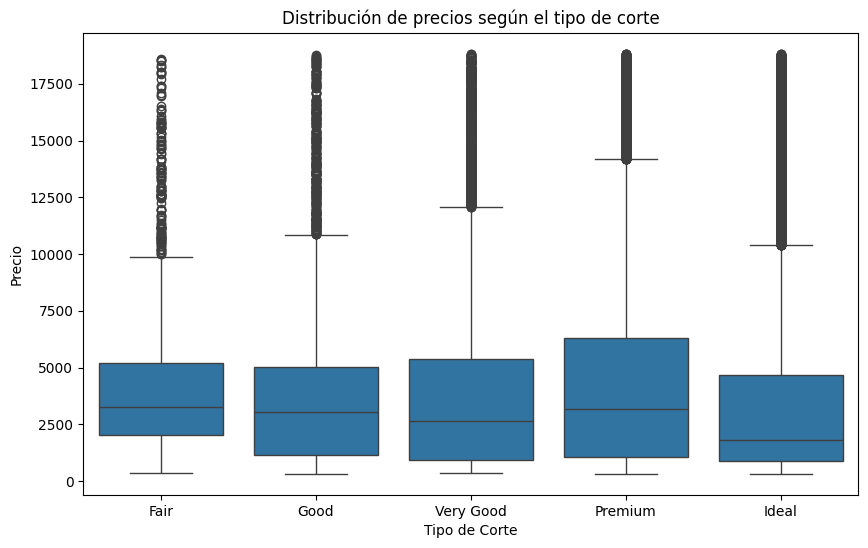

Estadístico F: 175.69
P-valor: 0.0000000000

Conclusión: Existe una diferencia significativa en los precios según el tipo de corte.


In [8]:
# Planteamiento del problema
print("¿El corte del diamante tiene un efecto significativo en su precio?\n")

# Visualización de la distribución de precios por corte
plt.figure(figsize=(10, 6))
sns.boxplot(x="cut", y="price", data=df, order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.title("Distribución de precios según el tipo de corte")
plt.xlabel("Tipo de Corte")
plt.ylabel("Precio")
plt.show()

# Separar los precios por tipo de corte
prices_by_cut = [df[df["cut"] == c]["price"] for c in df["cut"].unique()]

# Realizar ANOVA de una vía
f_stat, p_value = stats.f_oneway(*prices_by_cut)

# Mostrar resultados
print(f"Estadístico F: {f_stat:.2f}")
print(f"P-valor: {p_value:.10f}")

# Interpretación del resultado
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: Existe una diferencia significativa en los precios según el tipo de corte.")
else:
    print("\nConclusión: No se encontraron diferencias significativas entre los tipos de corte.")